<a href="https://colab.research.google.com/github/Sxbxn/Data_Mining-Study/blob/main/HCA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
url = 'https://raw.githubusercontent.com/Sxbxn/Data_Mining-Study/eb7b81fbd5f098a8f2d83e71c485340026d3169b/data/Iris.csv'
data = pd.read_csv(url)
x = data.iloc[:, [1, 2, 3, 4]].values
print(data)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(x)
data_scaled = pd.DataFrame(result)
data_scaled.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [8]:
feature = result[['x','y']]
print(feature)

            x         y
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]


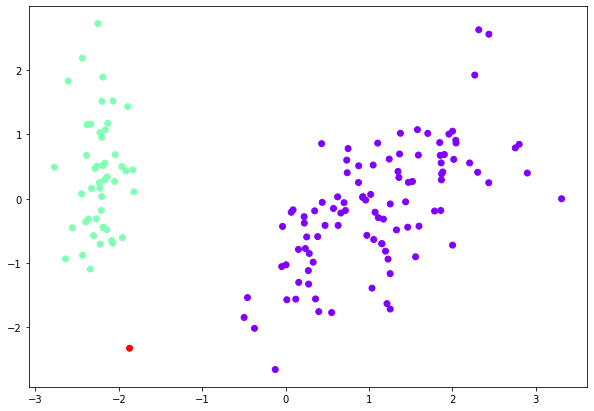

In [25]:
from sklearn.cluster import AgglomerativeClustering

single_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster1 = single_clustering.fit_predict(feature)
plt.figure(figsize=(10, 7))
plt.scatter(feature.iloc[:,0], feature.iloc[:,1], c=single_clustering.labels_, cmap='rainbow')

In [26]:
score = silhouette_score(feature, cluster1)
print(score)

0.5366259227654763


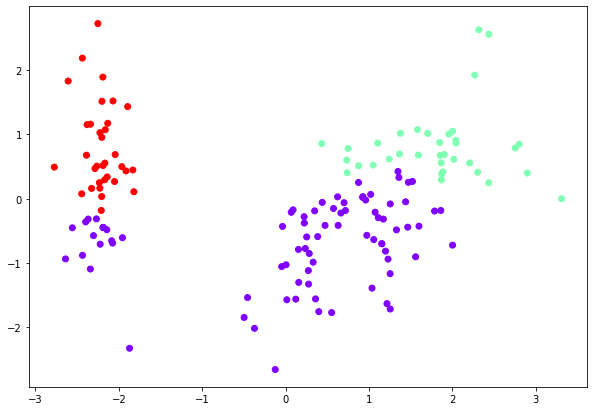

In [27]:
from sklearn.cluster import AgglomerativeClustering

complete_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster2 = complete_clustering.fit_predict(feature)
plt.figure(figsize=(10, 7))
plt.scatter(feature.iloc[:,0], feature.iloc[:,1], c=complete_clustering.labels_, cmap='rainbow')

In [28]:
score = silhouette_score(feature, cluster2)
print(score)

0.31753207083876417


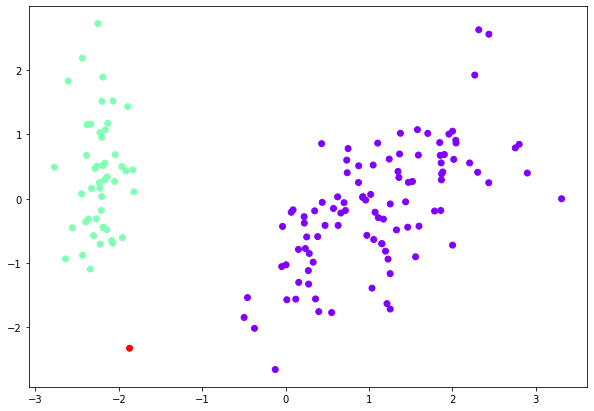

In [29]:
from sklearn.cluster import AgglomerativeClustering

average_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster3 = average_clustering.fit_predict(feature)
plt.figure(figsize=(10, 7))
plt.scatter(feature.iloc[:,0], feature.iloc[:,1], c=average_clustering.labels_, cmap='rainbow')

In [30]:
score = silhouette_score(feature, cluster3)
print(score)

0.5366259227654763


In [12]:
## 실루엣(Silhouette) 
# 군집을 만든 결과가 얼마나 유용한지 따지는 군집타당성지표(Clustering Validity Index) 중 하나
# 한 군집 내의 데이터들이 다른 군집과 비교해 얼마나 비슷한지를 나타내는 값
# 실루엣 값이 1에 가까울 수록 군집화가 적절히 되었다. -1에 가까울 수록 군집 결과가 타당하지 못하다.
# 일반적으로 실루엣 지표가 0.5보다 크다면 데이터의 클러스터링이 잘 되었다고 판단한다.
from sklearn.metrics import silhouette_score